Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

# Data and Library acquisition and preliminary analysis

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\C. Dev\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the train and test dataset and storing them in two different dataframes (train_data and test_data)

train_data = pd.read_csv(r"C:\Users\C. Dev\Desktop\train.csv")
test_data = pd.read_csv(r"C:\Users\C. Dev\Desktop\test.csv")

In [3]:
# Checking the head and shapes of train_data and test_data

train_data.head()
train_data.shape
test_data.head()
test_data.shape

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


(4209, 378)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


(4209, 377)

## Data Analysis

In [4]:
# Describing train_data and test_data

train_data.describe()
train_data.info()
test_data.describe()
test_data.info()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
# Concatenating train_data and test_data into a new dataframe (new_dataset)

train_new_data = train_data.drop('y',axis =1)
new_dataset = pd.concat([train_new_data,test_data])
new_dataset.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check for null and unique values for test and train sets.

for i in train_data.columns:
    train_data[i].unique()
for i in test_data.columns:
    test_data[i].unique()

train_data.isnull().sum()
test_data.isnull().sum()

array([   0,    6,    7, ..., 8412, 8415, 8417], dtype=int64)

array([130.81,  88.53,  76.26, ...,  85.71, 108.77,  87.48])

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)

array(['d', 'b', 'c', 'a'], dtype=object)

array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
       'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p', 'q', 's', 'r',
       'v', 'w', 'o', 'aa'], dtype=object)

array(['j', 'l', 'd', 'h', 'i', 'a', 'g', 'c', 'k', 'e', 'f', 'b'],
      dtype=object)

array(['o', 'x', 'e', 'n', 's', 'a', 'h', 'p', 'm', 'k', 'd', 'i', 'v',
       'j', 'b', 'q', 'w', 'g', 'y', 'l', 'f', 'u', 'r', 't', 'c'],
      dtype=object)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([1, 0], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([   1,    2,    3, ..., 8413, 8414, 8416], dtype=int64)

array(['az', 't', 'w', 'y', 'x', 'f', 'ap', 'o', 'ay', 'al', 'h', 'z',
       'aj', 'd', 'v', 'ak', 'ba', 'n', 'j', 's', 'af', 'ax', 'at', 'aq',
       'av', 'm', 'k', 'a', 'e', 'ai', 'i', 'ag', 'b', 'am', 'aw', 'as',
       'r', 'ao', 'u', 'l', 'c', 'ad', 'au', 'bc', 'g', 'an', 'ae', 'p',
       'bb'], dtype=object)

array(['v', 'b', 'l', 's', 'aa', 'r', 'a', 'i', 'p', 'c', 'o', 'm', 'z',
       'e', 'h', 'w', 'g', 'k', 'y', 't', 'u', 'd', 'j', 'q', 'n', 'f',
       'ab'], dtype=object)

array(['n', 'ai', 'as', 'ae', 's', 'b', 'e', 'ak', 'm', 'a', 'aq', 'ag',
       'r', 'k', 'aj', 'ay', 'ao', 'an', 'ac', 'af', 'ax', 'h', 'i', 'f',
       'ap', 'p', 'au', 't', 'z', 'y', 'aw', 'd', 'at', 'g', 'am', 'j',
       'x', 'ab', 'w', 'q', 'ah', 'ad', 'al', 'av', 'u'], dtype=object)

array(['f', 'a', 'c', 'e', 'd', 'g', 'b'], dtype=object)

array(['d', 'b', 'a', 'c'], dtype=object)

array(['t', 'b', 'a', 'z', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c',
       'af', 'ag', 'ab', 'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p',
       'q', 's', 'r', 'v', 'w', 'o', 'aa'], dtype=object)

array(['a', 'g', 'j', 'l', 'i', 'd', 'f', 'h', 'c', 'k', 'e', 'b'],
      dtype=object)

array(['w', 'y', 'j', 'n', 'm', 's', 'a', 'v', 'r', 'o', 't', 'h', 'c',
       'k', 'p', 'u', 'd', 'g', 'b', 'q', 'e', 'l', 'f', 'i', 'x'],
      dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [7]:
# Checking whether any column has all zero values

zero_cols = [cols for cols in new_dataset.columns if (new_dataset[cols] == 0).all()]
print(zero_cols)

[]


In [8]:
# Finding out the categorical columns

cat_cols = [cols for cols in new_dataset.columns if (new_dataset[cols].dtypes == 'object')]
cat_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [9]:
# Finding out the numerical columns

num_cols = [cols for cols in new_dataset.columns if (new_dataset[cols].dtypes == 'int64')]
print(num_cols)

['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', '

In [10]:
# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

num_data = new_dataset.drop(cat_cols,axis =1)
zero_var = [col for col in num_data.columns if num_data[col].var() == 0]
zero_var

[]

In [11]:
# Checking the unique values present in the categorical columns

for i in cat_cols:
    print(new_dataset[i].unique())

['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab' 'av' 'ag'
 'an' 'ae' 'p' 'bb']
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar' 'aj' 'ax' 'ab' 'w'
 'ad' 'u']
['a' 'e' 'c' 'f' 'd' 'b' 'g']
['d' 'b' 'c' 'a']
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa' 't' 'b' 'a' 'z']
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


## Data Visualisation

<AxesSubplot:xlabel='count', ylabel='X0'>

<AxesSubplot:xlabel='count', ylabel='X1'>

<AxesSubplot:xlabel='count', ylabel='X2'>

<AxesSubplot:xlabel='count', ylabel='X3'>

<AxesSubplot:xlabel='count', ylabel='X4'>

<AxesSubplot:xlabel='count', ylabel='X5'>

<AxesSubplot:xlabel='count', ylabel='X6'>

<AxesSubplot:xlabel='count', ylabel='X8'>

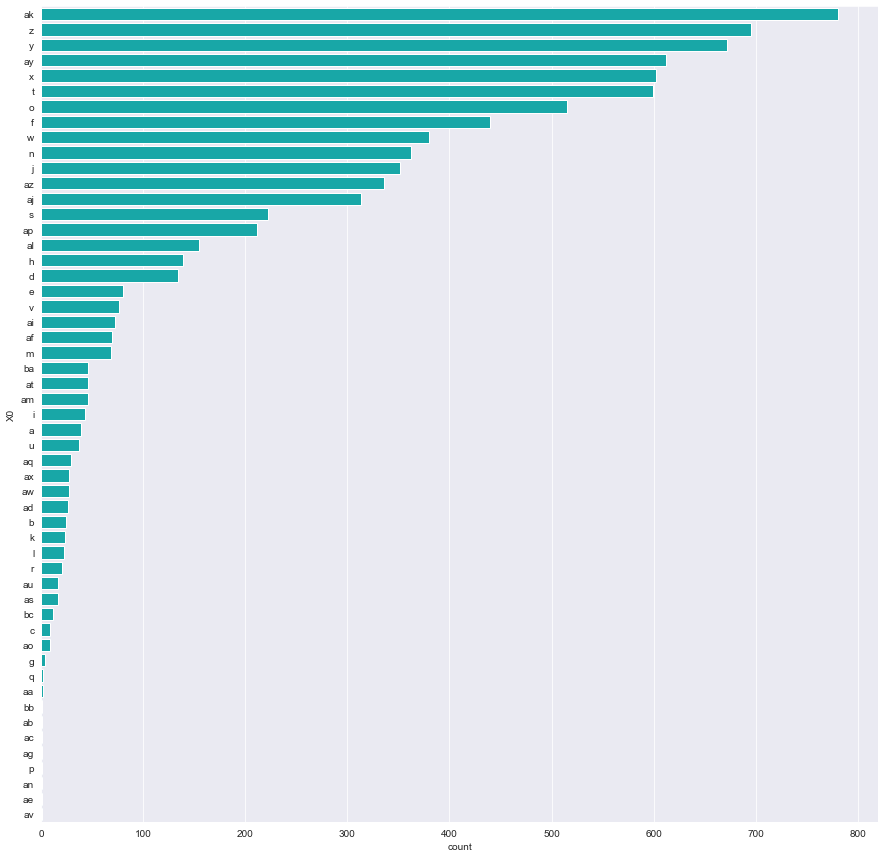

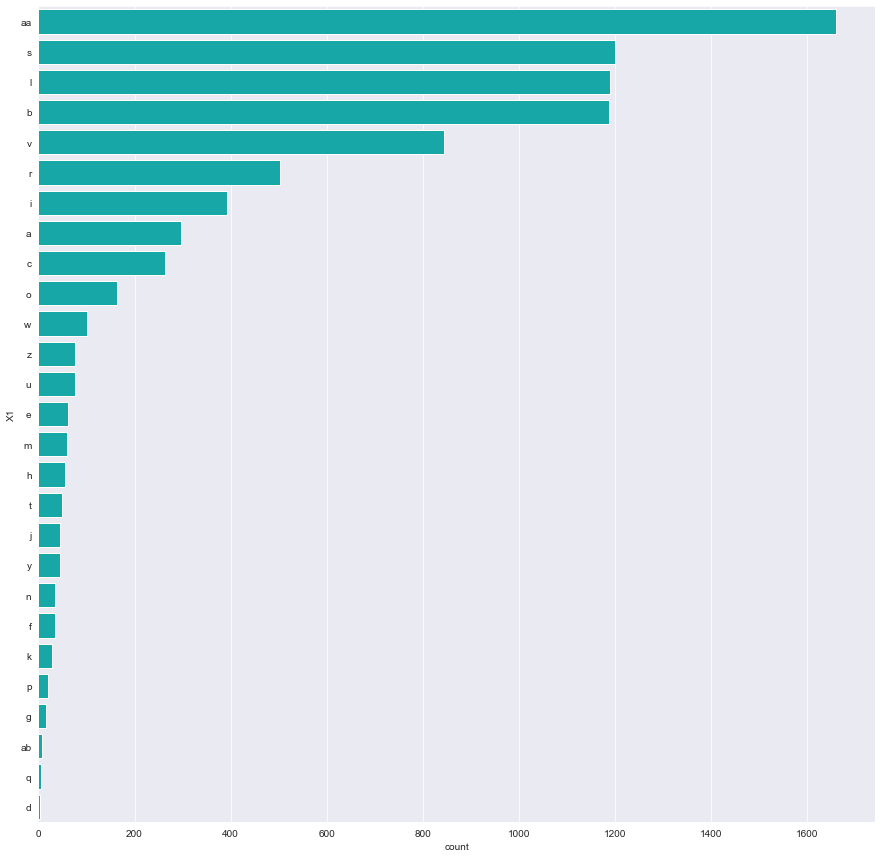

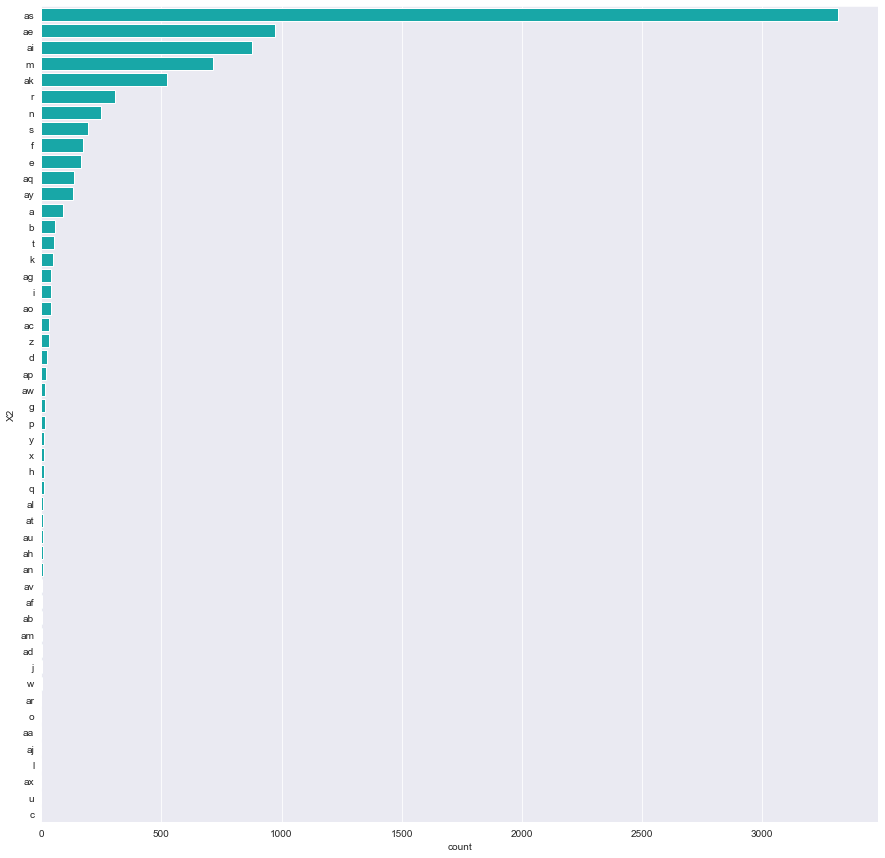

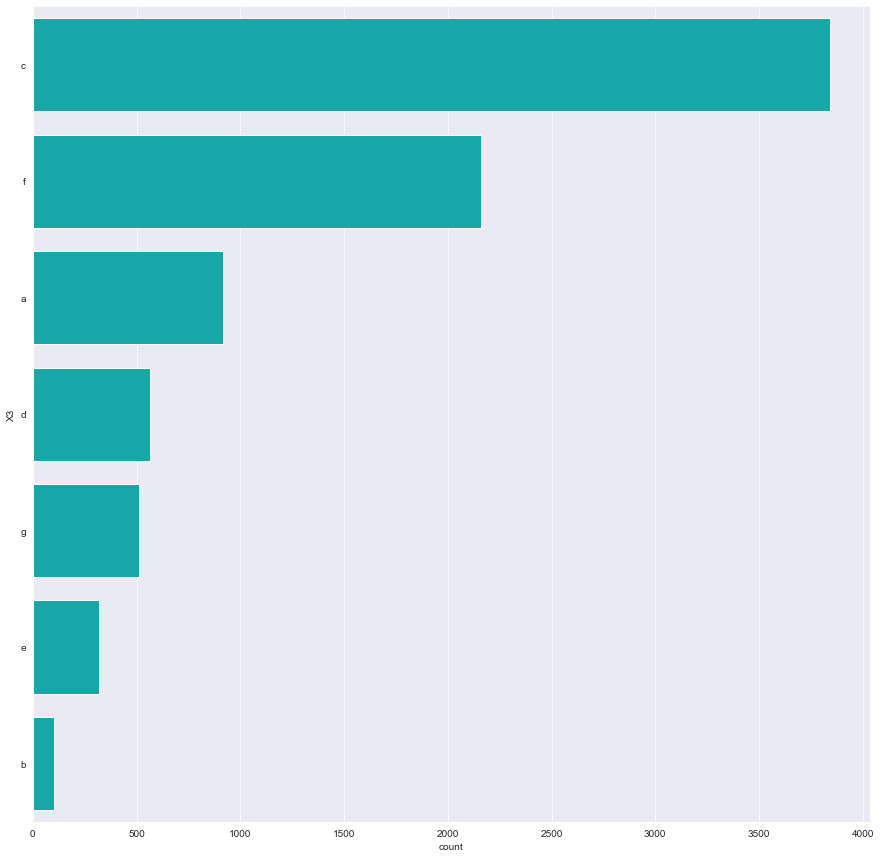

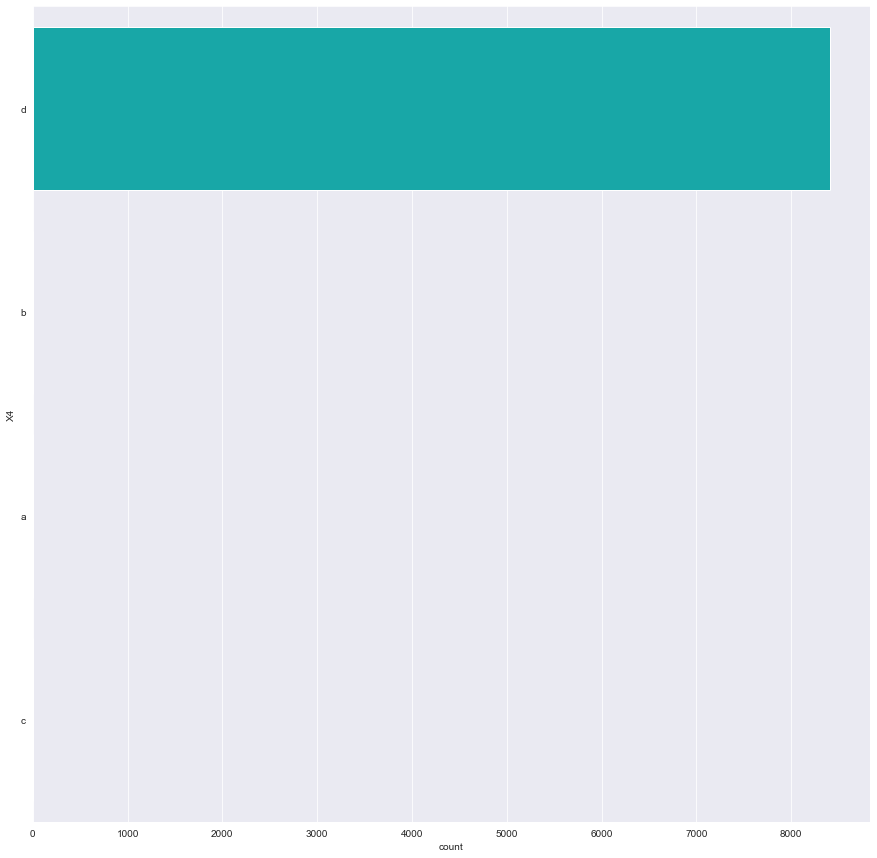

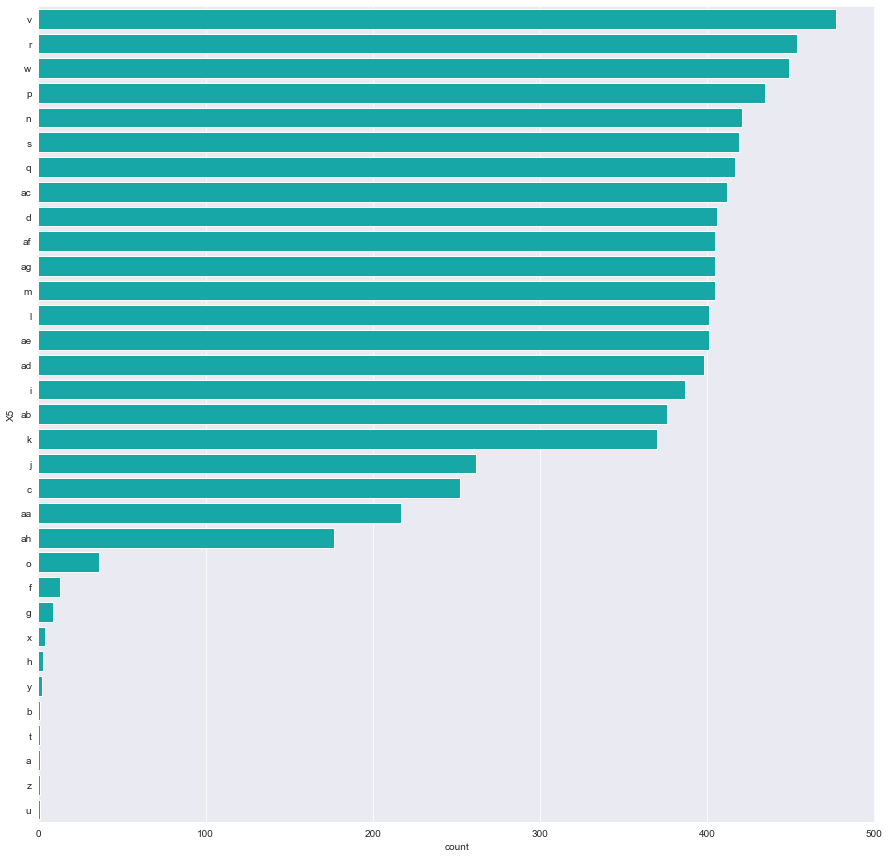

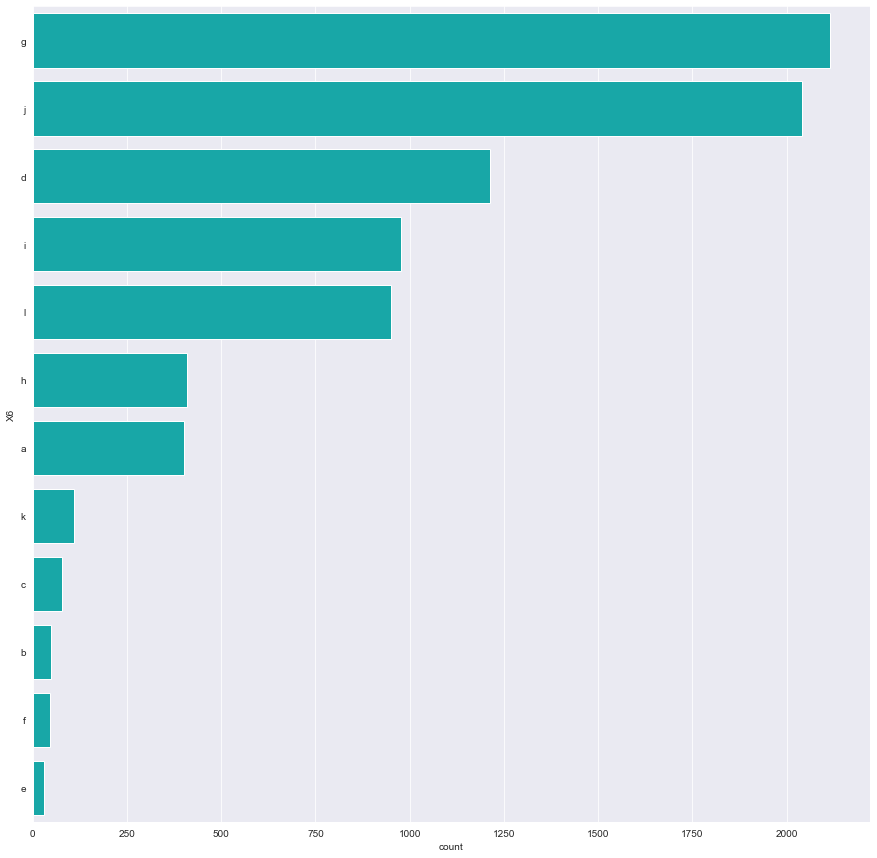

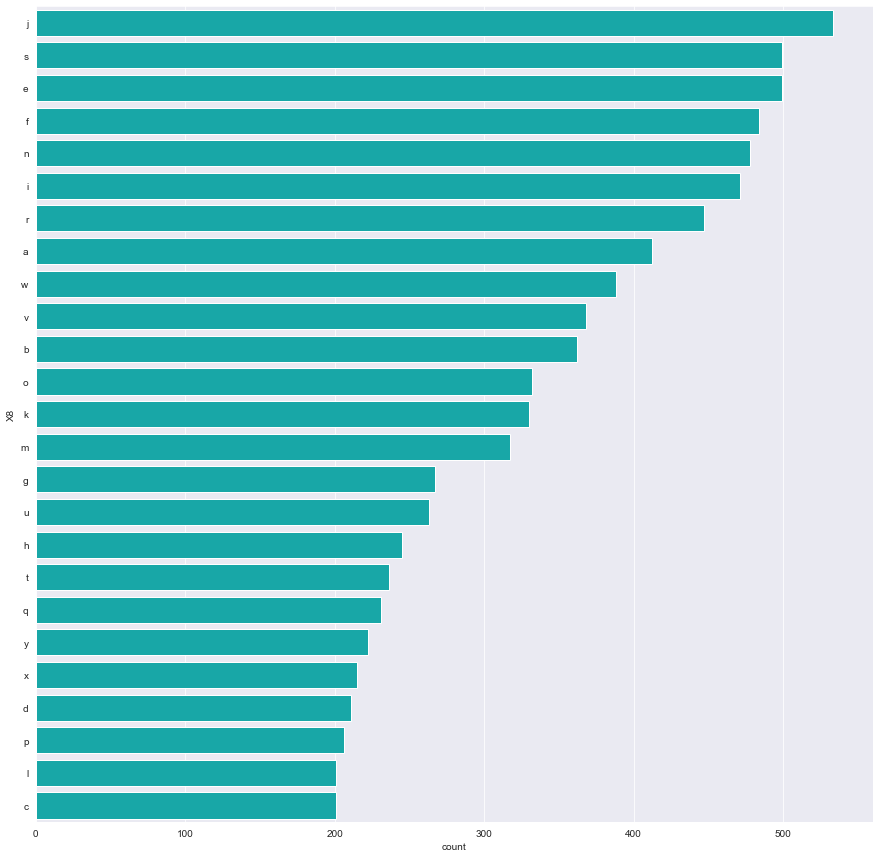

In [12]:
# Plotting count plots for the categorical data 

for i in cat_cols:
    sns.set_style("darkgrid")
    f, ax = plt.subplots(figsize=(15, 15))
    sns.countplot(y=i, data=new_dataset,  order = new_dataset[i].value_counts().index,  color="c");

<Figure size 1440x7200 with 0 Axes>

([<matplotlib.axis.YTick at 0x236022def08>,
 [Text(0, 0, 'ID'),
  Text(0, 1, 'X10'),
  Text(0, 2, 'X11'),
  Text(0, 3, 'X12'),
  Text(0, 4, 'X13'),
  Text(0, 5, 'X14'),
  Text(0, 6, 'X15'),
  Text(0, 7, 'X16'),
  Text(0, 8, 'X17'),
  Text(0, 9, 'X18'),
  Text(0, 10, 'X19'),
  Text(0, 11, 'X20'),
  Text(0, 12, 'X21'),
  Text(0, 13, 'X22'),
  Text(0, 14, 'X23'),
  Text(0, 15, 'X24'),
  Text(0, 16, 'X26'),
  Text(0, 17, 'X27'),
  Text(0, 18, 'X28'),
  Text(0, 19, 'X29'),
  Text(0, 20, 'X30'),
  Text(0, 21, 'X31'),
  Text(0, 22, 'X32'),
  Text(0, 23, 'X33'),
  Text(0, 24, 'X34'),
  Text(0, 25, 'X35'),
  Text(0, 26, 'X36'),
  Text(0, 27, 'X37'),
  Text(0, 28, 'X38'),
  Text(0, 29, 'X39'),
  Text(0, 30, 'X40'),
  Text(0, 31, 'X41'),
  Text(0, 32, 'X42'),
  Text(0, 33, 'X43'),
  Text(0, 34, 'X44'),
  Text(0, 35, 'X45'),
  Text(0, 36, 'X46'),
  Text(0, 37, 'X47'),
  Text(0, 38, 'X48'),
  Text(0, 39, 'X49'),
  Text(0, 40, 'X50'),
  Text(0, 41, 'X51'),
  Text(0, 42, 'X52'),
  Text(0, 43, 'X53'),

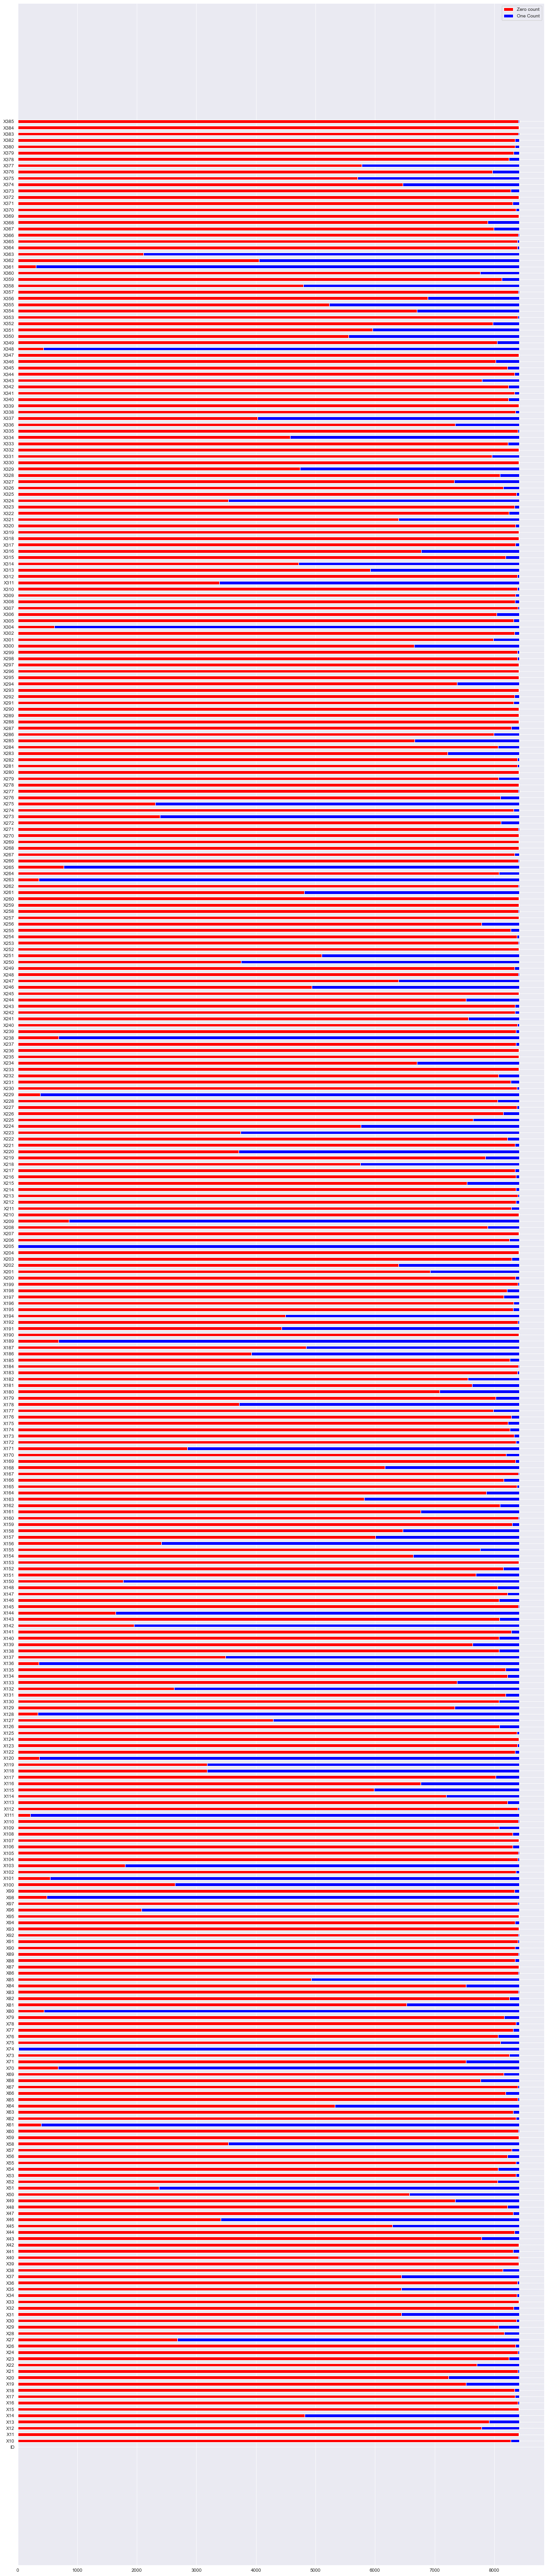

In [13]:
# Plotting horizontal bar chart (stacked) for numerical data
one_count_list = []
zero_count_list = []
for col in num_cols:
    zero_count_list.append((new_dataset[col]==0).sum())
    one_count_list.append((new_dataset[col]==1).sum())

N = len(num_cols)
ind = np.arange(N)
width = 0.50

plt.figure(figsize=(20,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, num_cols)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()


## Data Preparation

In [14]:
# Apply label encoder

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for i in cat_cols:
    lb.fit(new_dataset[i])
    train_data[i] = lb.transform(train_data[i].astype('str'))
    test_data[i] = lb.transform(test_data[i].astype('str'))
    

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [15]:
# Checking the train_data and test_data

train_data.sort_index(axis=1, inplace=True)
test_data.sort_index(axis=1,inplace=True)
train_data.head()
test_data.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,37,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,6,37,21,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,7,24,24,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,9,24,21,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,13,24,23,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02


,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,1,24,23,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,46,3,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,24,23,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,4,24,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5,49,20,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
# Dropping the column "ID" from both train_data and test_data

train_data = train_data.drop(["ID"], axis=1)
test_data = test_data.drop(["ID"], axis=1) 
train_data

# Dropping column "y" from train_data and storing the rest of the data into x variable also storing the "y" column data in y 
#variable

x = train_data.drop(['y'],axis = 1)
y = train_data['y']
x
y

,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,37,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,37,21,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,24,24,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,24,21,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,24,23,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,107.39
4205,36,16,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,108.77
4206,10,23,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,109.22
4207,11,19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,87.48


,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,37,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,21,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,24,24,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,24,21,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,24,23,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4205,36,16,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4206,10,23,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4207,11,19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [18]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

test = test_data.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

x
y
test

(2946, 376)

(2946,)

(1263, 376)

(1263,)

,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,37,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,21,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,24,24,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,24,21,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,24,23,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4205,36,16,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4206,10,23,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4207,11,19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

array([[24, 23,  0, ...,  0,  1,  0],
       [46,  3,  0, ...,  0,  1,  0],
       [24, 23,  0, ...,  0,  1,  0],
       ...,
       [51, 23,  0, ...,  0,  1,  0],
       [10, 23,  0, ...,  0,  1,  0],
       [46,  1,  0, ...,  0,  1,  0]], dtype=int64)

## Feature Engineering

In [19]:
# Applying StandardScaler to standardize the train an test set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
# Applying PCA for feature selection

from sklearn.decomposition import PCA

pca = PCA(n_components=12)
x_train1 = pca.fit_transform(x_train)
x_test1 = pca.fit_transform(x_test)
pca.explained_variance_ratio_

array([0.06851874, 0.05965272, 0.0478273 , 0.03747134, 0.03418013,
       0.03273601, 0.02936726, 0.02281833, 0.01982128, 0.01877915,
       0.01819401, 0.01729655])

## Model Initialisation, Prediction and Evaluation

In [ ]:
# Applying XGBoost model for Regression and prediction

import xgboost as xgb

model = xgb.XGBRegressor()

model.fit(x_train,y_train)
preds = model.predict(x_test)
preds

In [28]:
# Calculating the Root Mean Squared Error (RMSE) for the predicted data

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.126421


In [23]:
# Deploying Cross Validation algorithm to minimise the train and test RMSE

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth':6,
    'alpha':40,
    'lambda':20,
    'subsample': 0.5,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(y_train), # base prediction = mean(target)
    'silent': 1}


cv_result = xgb.cv(xgb_params,dtrain,num_boost_round=500,verbose_eval=50,show_stdv=False)

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# Train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)


[14:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed d

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

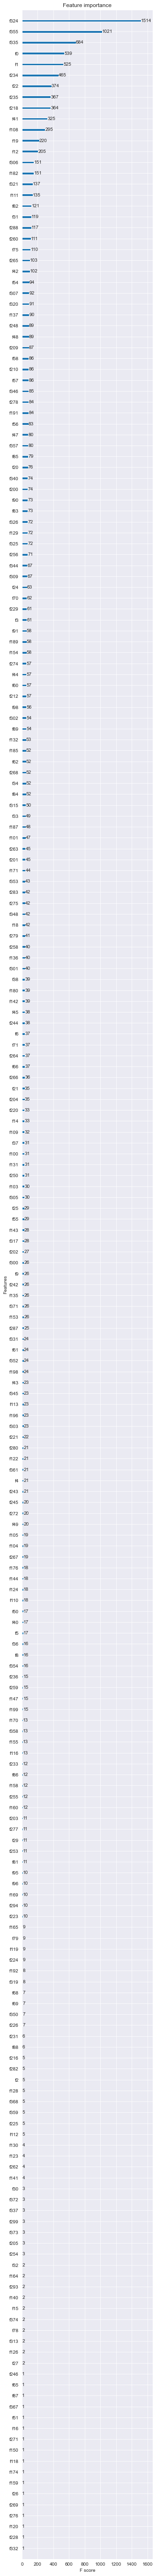

In [24]:
# Plotting the feature with their F-Score and checking which are the most important features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5, 100))
xgb.plot_importance(model,ax)
plt.show()


## Model Testing

In [25]:
# Predict your test_df values using XGBoost

test_df_predictions = model.predict(dtest)
test_df_predictions

array([ 96.14065 ,  95.031906,  97.126144, ...,  95.85386 , 106.1074  ,
        95.22096 ], dtype=float32)